## Improving model fit

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255.0

In [11]:
model = Sequential([
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

**Training a MNIST model with an incorrectly high learning rate**

In [12]:
model.compile(optimizer=RMSprop(1.), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 1034.6010 - accuracy: 0.4200 - val_loss: 2.1726 - val_accuracy: 0.2886
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 4.0773 - accuracy: 0.2876 - val_loss: 3.7119 - val_accuracy: 0.3434
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 3.5052 - accuracy: 0.3008 - val_loss: 2.3375 - val_accuracy: 0.2867
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1753 - accuracy: 0.2945 - val_loss: 2.3124 - val_accuracy: 0.3024
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 3.0314 - accuracy: 0.2951 - val_loss: 2.0691 - val_accuracy: 0.2810
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 2.7294 - accuracy: 0.2666 - val_loss: 2.1609 - val_accuracy: 0.2249
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6444 - accuracy: 0.2779 - val_loss: 2.1446 - val_accuracy: 0.2630
Epo

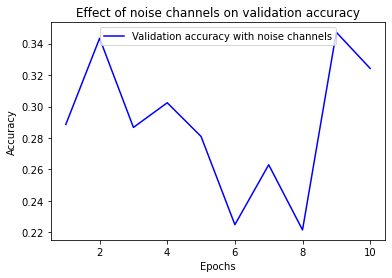

In [13]:
epochs = range(1, 11)
plt.plot(epochs, history.history["val_accuracy"], "b-", label="Low learning rate")
plt.title("Effect of high learning rate")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**The same model with a more appropriate learning rate**

In [15]:
model.compile(optimizer=RMSprop(1e-2), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 1.7805 - accuracy: 0.3387 - val_loss: 2.2292 - val_accuracy: 0.3553
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 1.7734 - accuracy: 0.3409 - val_loss: 2.2728 - val_accuracy: 0.3591
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 1.7684 - accuracy: 0.3467 - val_loss: 2.2601 - val_accuracy: 0.3582
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 1.7912 - accuracy: 0.3462 - val_loss: 2.2864 - val_accuracy: 0.3639
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 1.7936 - accuracy: 0.3510 - val_loss: 2.3307 - val_accuracy: 0.3652
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 1.7603 - accuracy: 0.3519 - val_loss: 2.3315 - val_accuracy: 0.3699
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 1.7542 - accuracy: 0.3568 - val_loss: 2.3908 - val_accuracy: 0.3662
Epoch 

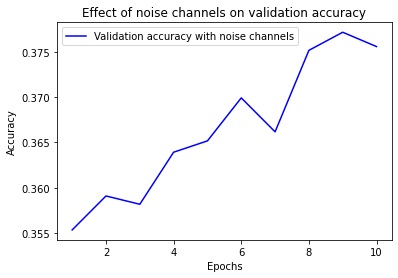

In [16]:
epochs = range(1, 11)
plt.plot(epochs, history.history["val_accuracy"], "b-", label="Appropriate learnig rate")
plt.title("Effect of appropriate learning rate on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()